# 임포트 작성

In [2]:
import pandas as pd
import torch
from kobert_transformers import get_kobert_model
import torch.nn as nn
from kobert_transformers import get_tokenizer
import os
import matplotlib.pyplot as plt

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# data 불러오기

In [19]:
df=pd.read_csv('lg_data_fix v2.0.csv') # readcsv 부르기-> index로 컬럼 설정해서 부름

In [20]:
df.head() # 확인

,date,links,titles,contests,present_closing price,대비,판별
0,2023. 7. 5,https://finance.naver.com/item/news_read.naver...,"LG엔솔, 5월 누적 글로벌 전기차 배터리 점유율 2→3위",SNE리서치 제공[파이낸셜뉴스] 올해 1~5월 글로벌 전기차용 배터리 점유율에서 L...,NaN,NaN,NaN
1,2023. 7. 5,https://finance.naver.com/item/news_read.naver...,"LG엔솔, 하반기 점진적 실적 회복 전망…목표가 70만원-교보",교보증권이 5일 LG에너지솔루션이 하반기 점진적으로 실적을 회복할 것이라고 전망했다...,NaN,NaN,NaN
2,2023. 7. 5,https://finance.naver.com/item/news_read.naver...,"LG엔솔, 2Q 영업이익 컨센서스 하향 전망…목표가 74만원-삼성",[이데일리 원다연 기자] 삼성증권은 5일 LG에너지솔루션(373220)에 대해 2분...,NaN,NaN,NaN
3,2023. 7. 4,https://finance.naver.com/item/news_read.naver...,"LG엔솔, 단기 부진에도 변함없는 경쟁력…업종 ‘탑픽’-한투",[이데일리 원다연 기자] 한국투자증권은 LG에너지솔루션(373220)에 대해 단기적...,569000.0,NaN,NaN
4,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,실적 둔화에 밸류에이션 하락까지... LG엔솔 적정주가 잇따른 하향,LG에너지솔루션 CI최근 한달간 주가가 7% 가량 하락한 LG에너지솔루션에 대해 증...,573000.0,-4000.0,0.0


In [21]:
df.columns

Index(['date', 'links', 'titles', 'contests', 'present_closing price', '대비',
       '판별'],
      dtype='object')

In [22]:
df.isnull().sum().sum() # 결측치확인

11

In [23]:
df.dropna(inplace=True)

In [24]:
df.columns

Index(['date', 'links', 'titles', 'contests', 'present_closing price', '대비',
       '판별'],
      dtype='object')

In [25]:
df

,date,links,titles,contests,present_closing price,대비,판별
4,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,실적 둔화에 밸류에이션 하락까지... LG엔솔 적정주가 잇따른 하향,LG에너지솔루션 CI최근 한달간 주가가 7% 가량 하락한 LG에너지솔루션에 대해 증...,573000.0,-4000.0,0.0
5,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,"인팩, SK온·LG엔솔과 손잡고 간다···목표가 1만7000원-리서치알...",켄터키주에 5300만달러 투자 인팩 CI / 사진=인팩 제공[파이낸셜뉴스] 리서치알...,573000.0,-4000.0,0.0
6,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,"엘앤에프, 최대 고객사는 LG엔솔과 테슬라-메리츠",[이데일리 김인경 기자] 메리츠증권은 엘앤에프(066970)가 시장 기대치에 부합하...,573000.0,-4000.0,0.0
7,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,IRA 효과 터진다'..LG엔솔·SK온 2분기 보조금 3700억,지난달 27일 경기도 고양시 킨텍스에서 열린 '2023 세계 배터리 & 충전 인프라...,573000.0,-4000.0,0.0
8,2023. 7. 2,https://finance.naver.com/item/news_read.naver...,"[스타즈IR] LG엔솔, IRA 최대 수혜주…올 영업익 3조 돌파 기대",매출은 36조5680억···42% 급증 전망물적 분할 4년만에 30배 외형성장향후 ...,553000.0,20000.0,1.0
...,...,...,...,...,...,...,...
1543,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,삼성證 “수급부담 LG엔솔보다...실적 양호한 삼성SDI 주목해야”,양사 2분기 실적 전망 엇갈려배터리株 중국대비 ‘웃돈’ 소멸국내 2차전지 업체들의 ...,370500.0,3000.0,1.0
1544,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,현대차 이어 LG엔솔까지…‘난공불략’ 日 빗장 풀다 [비즈360],"현대차 ,이달 중 아이오닉5 고객인도 개시LG엔솔, 닛산 이어 이스즈에 배터리 납품...",370500.0,3000.0,1.0
1545,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,"거래소 “LG에너지솔루션, 1조 규모 배터리 공급 보도 관련 조회공시 ...",한국거래소는 LG에너지솔루션에 대해 1조원 규모로 일본 이스즈자동차에 배터리 공급을...,370500.0,3000.0,1.0
1546,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,"“LG엔솔, 3분기부터 업황 개선…2차전지 내 최선호주”",[한국투자증권 보고서]목표주가 57만→52만 하향[서울경제] 한국투자증권이 LG에너...,370500.0,3000.0,1.0


In [26]:
df.reset_index(inplace=True)

In [27]:
df

,index,date,links,titles,contests,present_closing price,대비,판별
0,4,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,실적 둔화에 밸류에이션 하락까지... LG엔솔 적정주가 잇따른 하향,LG에너지솔루션 CI최근 한달간 주가가 7% 가량 하락한 LG에너지솔루션에 대해 증...,573000.0,-4000.0,0.0
1,5,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,"인팩, SK온·LG엔솔과 손잡고 간다···목표가 1만7000원-리서치알...",켄터키주에 5300만달러 투자 인팩 CI / 사진=인팩 제공[파이낸셜뉴스] 리서치알...,573000.0,-4000.0,0.0
2,6,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,"엘앤에프, 최대 고객사는 LG엔솔과 테슬라-메리츠",[이데일리 김인경 기자] 메리츠증권은 엘앤에프(066970)가 시장 기대치에 부합하...,573000.0,-4000.0,0.0
3,7,2023. 7. 3,https://finance.naver.com/item/news_read.naver...,IRA 효과 터진다'..LG엔솔·SK온 2분기 보조금 3700억,지난달 27일 경기도 고양시 킨텍스에서 열린 '2023 세계 배터리 & 충전 인프라...,573000.0,-4000.0,0.0
4,8,2023. 7. 2,https://finance.naver.com/item/news_read.naver...,"[스타즈IR] LG엔솔, IRA 최대 수혜주…올 영업익 3조 돌파 기대",매출은 36조5680억···42% 급증 전망물적 분할 4년만에 30배 외형성장향후 ...,553000.0,20000.0,1.0
...,...,...,...,...,...,...,...,...
1539,1543,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,삼성證 “수급부담 LG엔솔보다...실적 양호한 삼성SDI 주목해야”,양사 2분기 실적 전망 엇갈려배터리株 중국대비 ‘웃돈’ 소멸국내 2차전지 업체들의 ...,370500.0,3000.0,1.0
1540,1544,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,현대차 이어 LG엔솔까지…‘난공불략’ 日 빗장 풀다 [비즈360],"현대차 ,이달 중 아이오닉5 고객인도 개시LG엔솔, 닛산 이어 이스즈에 배터리 납품...",370500.0,3000.0,1.0
1541,1545,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,"거래소 “LG에너지솔루션, 1조 규모 배터리 공급 보도 관련 조회공시 ...",한국거래소는 LG에너지솔루션에 대해 1조원 규모로 일본 이스즈자동차에 배터리 공급을...,370500.0,3000.0,1.0
1542,1546,2022. 7. 6,https://finance.naver.com/item/news_read.naver...,"“LG엔솔, 3분기부터 업황 개선…2차전지 내 최선호주”",[한국투자증권 보고서]목표주가 57만→52만 하향[서울경제] 한국투자증권이 LG에너...,370500.0,3000.0,1.0


In [28]:
df.columns

Index(['index', 'date', 'links', 'titles', 'contests', 'present_closing price',
       '대비', '판별'],
      dtype='object')

In [29]:
df.drop(columns='index',inplace=True)

In [32]:
type(df['date'][0])

str

In [33]:
# date' str데이터 -> 시계열 데이터로 변경
df['date'] = pd.to_datetime(df['date'])

In [34]:
df.sort_values('date',ascending=True,inplace=True) # date  기준으로 내림차순

In [35]:
df

,date,links,titles,contests,present_closing price,대비,판별
1543,2022-07-06,https://finance.naver.com/item/news_read.naver...,"""LG엔솔 목표가 8.77% 하향…락업 해제만 지나면 주가 오를 것""-...",목표가 52만원 제시한국투자증권은 6일 LG에너지솔루션에 대해 2025년 상각전 영...,370500.0,3000.0,1.0
1535,2022-07-06,https://finance.naver.com/item/news_read.naver...,LG엔솔 “日 이스즈자동차과 배터리 공급 협의중”,[이데일리 정두리 기자] LG에너지솔루션(373220)은 일본 이스즈자동차에 1조원...,370500.0,3000.0,1.0
1536,2022-07-06,https://finance.naver.com/item/news_read.naver...,"[한경 라씨로] 하락장 속 나홀로 상승한 LG엔솔, 기관이 쓸어 담아","한경라씨로는 인공지능(AI) 알고리즘을 기반으로 상장 종목들의 시세, 수급, 시황 ...",370500.0,3000.0,1.0
1537,2022-07-06,https://finance.naver.com/item/news_read.naver...,"[특징주] LG엔솔, '1조 규모’ 배터리 공급 소식에 강세",[헤럴드경제=양대근 기자] LG에너지솔루션이 일본 상용차업체에 1조원 규모 배터리를...,370500.0,3000.0,1.0
1542,2022-07-06,https://finance.naver.com/item/news_read.naver...,"“LG엔솔, 3분기부터 업황 개선…2차전지 내 최선호주”",[한국투자증권 보고서]목표주가 57만→52만 하향[서울경제] 한국투자증권이 LG에너...,370500.0,3000.0,1.0
...,...,...,...,...,...,...,...
4,2023-07-02,https://finance.naver.com/item/news_read.naver...,"[스타즈IR] LG엔솔, IRA 최대 수혜주…올 영업익 3조 돌파 기대",매출은 36조5680억···42% 급증 전망물적 분할 4년만에 30배 외형성장향후 ...,553000.0,20000.0,1.0
3,2023-07-03,https://finance.naver.com/item/news_read.naver...,IRA 효과 터진다'..LG엔솔·SK온 2분기 보조금 3700억,지난달 27일 경기도 고양시 킨텍스에서 열린 '2023 세계 배터리 & 충전 인프라...,573000.0,-4000.0,0.0
2,2023-07-03,https://finance.naver.com/item/news_read.naver...,"엘앤에프, 최대 고객사는 LG엔솔과 테슬라-메리츠",[이데일리 김인경 기자] 메리츠증권은 엘앤에프(066970)가 시장 기대치에 부합하...,573000.0,-4000.0,0.0
1,2023-07-03,https://finance.naver.com/item/news_read.naver...,"인팩, SK온·LG엔솔과 손잡고 간다···목표가 1만7000원-리서치알...",켄터키주에 5300만달러 투자 인팩 CI / 사진=인팩 제공[파이낸셜뉴스] 리서치알...,573000.0,-4000.0,0.0


In [38]:
df.to_csv('lg_data_fix.csv') # data 변경

# 시계열 데이터 확인

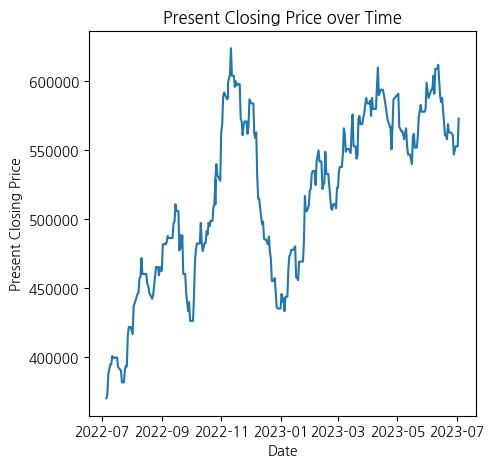

In [36]:
x = df['date']
y = df['present_closing price']
plt.figure(figsize=(5,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Present Closing Price')
plt.title('Present Closing Price over Time')
plt.show()

# data set 만들기

SyntaxError: invalid syntax (3691987195.py, line 3)

In [93]:
from torch.utils.data.distributed import Dataset
from kobert_transformers import get_tokenizer
import torch
kobert_tokenizer=get_tokenizer()
class MakeDataset(Dataset):
#     #사전 정의
    def __init__(self,dataset,tokenizer): # self, rating_df
        super().__init__()
        self.dataset=dataset # dataset 사전 설정
        self.ko_tokenizer=tokenizer
        
        
    def tokenizer(self):
        kobert_token_list=[] # 토큰화된거 넣을 리스트
        for i in self.dataset['contests']:
            token_text=self.ko_tokenizer(i)
            kobert_token_list.append(token_text)
            
        return kobert_token_list
            
            
        
        
        
        
#         return self.__dataset['contests']
        
#          이미 학습된 모델 불러 옴
#          token(기사)
#          기사들 전부 토큰
#          max 뽑아줌
#
#     def padding(self):
#         pass
#         ###max길이만큼 전부 패딩 해줌
#     데이터 전체량 갖고오기
    def __len__(Self):
        ### 데이터 전체량 갖고오기 
        pass
    def __getitem__(self,idx):
        pass
        ### idx넣으면 해당 데이터 갖고오기


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'KoBertTokenizer'.


In [94]:
kobert_dataset=MakeDataset(df,kobert_tokenizer)

In [99]:
len(df)

1544

In [145]:
kobert_tokenizer.vocab_size

8002

In [96]:
kobert_list=kobert_dataset.tokenizer().

In [102]:
kobert_max=[max(i) for i in kobert_list]

In [115]:
type(kobert_list[0].items())

dict_items

In [140]:
len(kobert_list)

1544

In [128]:
kobert_list[0].keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [141]:
len(kobert_list[0]['input_ids'])

411

In [144]:
len(kobert_list[-1]['input_ids'])

610

In [137]:
for i in range(3):
    for j in kobert_list[i]['input_ids']:
        print(j)
        

2
2078
5330
517
180
6153
4140
5503
7646
7086
617
7126
668
6899
6618
6095
6602
6896
1685
554
137
5712
2658
5336
7207
3383
18
282
270
305
278
264
40
6116
611
54
220
1429
7467
5782
6197
2080
6116
1300
517
185
6153
6903
517
180
6154
624
54
202
203
1443
54
1569
4769
520
6168
6629
15
6983
553
7393
7318
3267
520
7458
6559
7925
7276
15
5760
3592
7869
54
7096
5664
4162
7427
7993
4958
7646
3338
518
119
6418
4553
3047
7086
2002
605
7253
209
6861
46
3383
547
225
6862
3384
2991
4553
7483
18
7514
6591
6553
6664
40
1649
543
54
94
2185
5868
4027
8
7105
518
119
6418
4682
2673
2714
3533
5330
5760
589
6419
5655
4805
5330
6896
4012
5330
5876
553
6418
3533
5330
7072
1516
2658
7848
2418
6623
1259
7096
1315
6855
7245
4733
6697
6003
7886
1428
3971
5330
1630
3405
6371
1561
7248
5561
1848
8
7102
2261
54
7253
3338
518
127
137
5712
2912
6629
7207
5561
7389
553
7393
7318
4716
3494
6035
762
7088
1300
620
7577
6079
6983
7659
6705
18
416
401
40
6903
618
416
401
6079
1429
7474
5782
54
583
5712
4015
7389
4810
762
7086


In [148]:
kobert_tokenizer.convert_tokens_to_ids("아이고")

0

In [149]:
kobert_tokenizer.tokenize("[CLS] 한국어 모델을 공유합니다. [SEP]")

['[CLS]', '▁한국', '어', '▁모델', '을', '▁공유', '합니다', '.', '[SEP]']

In [150]:
kobert_tokenizer.convert_tokens_to_ids(['[CLS]', '▁한국', '어', '▁모델', '을', '▁공유', '합니다', '.', '[SEP]'])

[2, 4958, 6855, 2046, 7088, 1050, 7843, 54, 3]

In [ ]:
for i in kobert_list[]